In [1]:
0.5*0.05+0.07/3+0.1/6


[1] 0.065

In [2]:
0.07/3/0.065

[1] 0.3589744

In [4]:
x = seq(0,3,1)
x

[1] 0 1 2 3

In [6]:
p = dhyper(x,3,4,4)
p

[1] 0.02857143 0.34285714 0.51428571 0.11428571

In [7]:
cumsum(p)

[1] 0.02857143 0.37142857 0.88571429 1.00000000

In [8]:
x
p

[1] 0 1 2 3

[1] 0.02857143 0.34285714 0.51428571 0.11428571

In [9]:
x*p

[1] 0.0000000 0.3428571 1.0285714 0.3428571

In [12]:
EX = sum(x*p)
EX

[1] 1.714286

In [13]:
EXX = sum(x*x*p)
EXX
DX = EXX - EX*EX
DX

[1] 3.428571

[1] 0.4897959

In [14]:
sqrt(DX)

[1] 0.6998542

In [15]:
EL = EX*200
EL

[1] 342.8571

In [16]:
DL = 200*200*DX
sqrt(DL)

[1] 139.9708

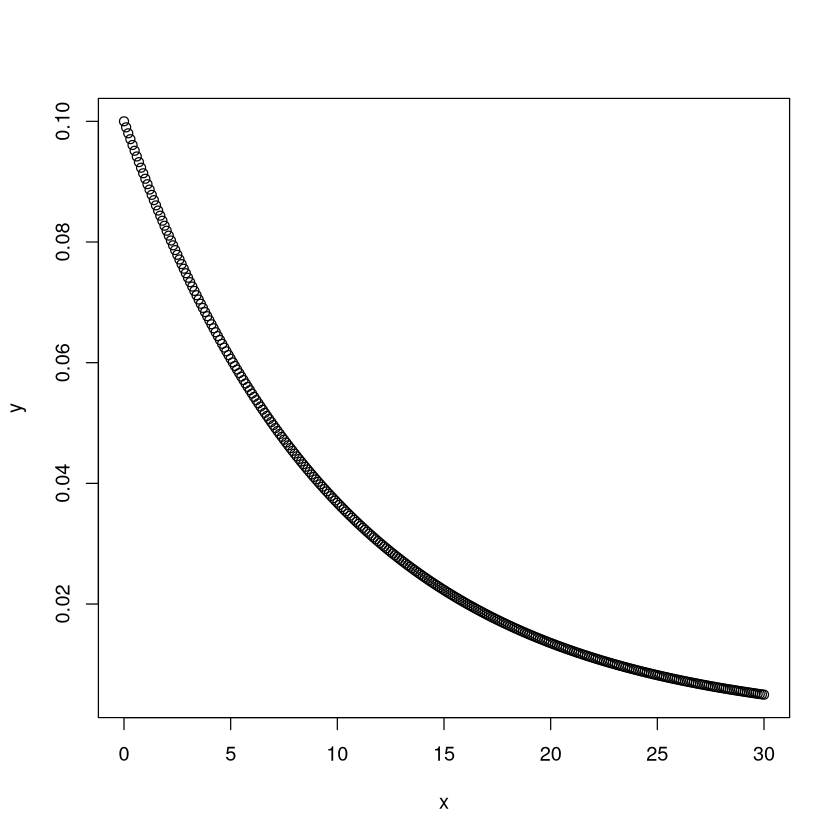

In [17]:
x = seq(0,30,0.1)
y = dexp(x,1/10)
plot(x,y)

In [18]:
qexp(0.89,1/10)

[1] 22.07275

In [19]:
(1-pexp(12,1/10))/(1-pexp(8,1/10))

[1] 0.67032

In [1]:
pnorm(13,10,sqrt(10/4))

[1] 0.9711102

In [24]:
library(readxl)

In [26]:
data = read_excel("data_PS.xlsx")
head(data)

New names:
* `` -> ...1



...1,pa_norm,pa_dist,field
<dbl>,<dbl>,<dbl>,<chr>
0,72.7,49.8,sportovni
1,74.4,64.0,sportovni
2,67.9,56.4,sportovni
3,59.8,40.6,sportovni
4,68.7,47.2,sportovni
5,66.1,65.6,sportovni


In [27]:
colnames(data)=c("id","norm","dist","field")

In [28]:
head(data)

id,norm,dist,field
<dbl>,<dbl>,<dbl>,<chr>
0,72.7,49.8,sportovni
1,74.4,64.0,sportovni
2,67.9,56.4,sportovni
3,59.8,40.6,sportovni
4,68.7,47.2,sportovni
5,66.1,65.6,sportovni


In [29]:
table(data$field)


ekonomicky  humanitni  sportovni  technicky 
       198        199        198        198 

In [30]:
dist_tech = data$dist[data$field=="technicky"]

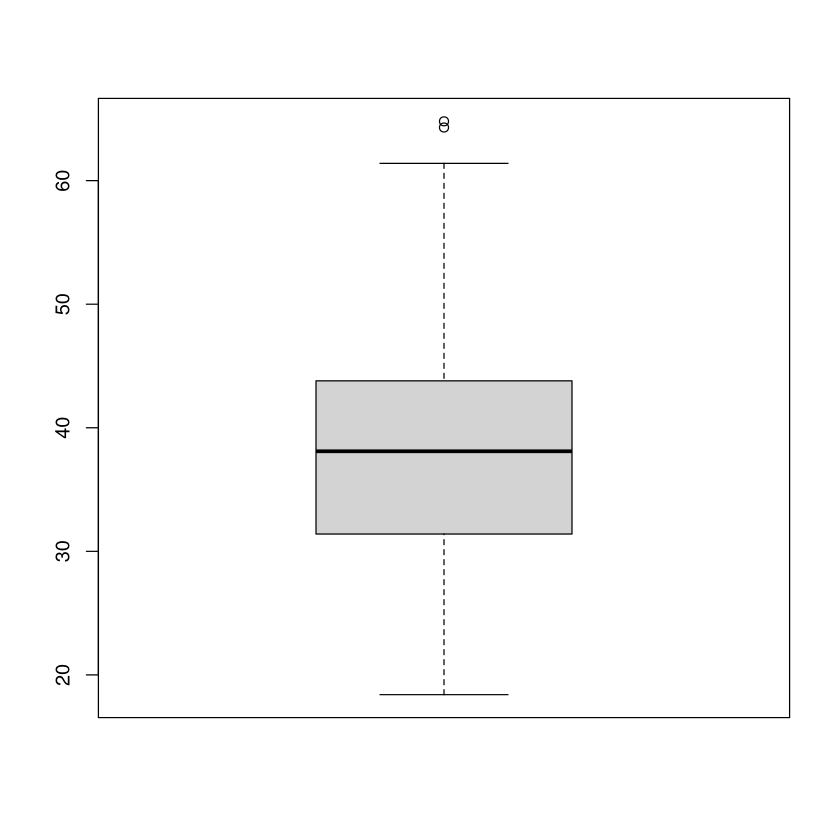

In [32]:
boxplot(dist_tech)

In [33]:
library(dplyr)
library(rstatix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [36]:
outliars = data %>% group_by(field) %>% identify_outliers(dist)
outliars

field,id,norm,dist,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
ekonomicky,416,83.7,74.1,TRUE,FALSE
humanitni,653,91.2,77.7,TRUE,FALSE
sportovni,96,105.4,98.9,TRUE,FALSE
sportovni,118,101.0,102.0,TRUE,FALSE
technicky,206,65.1,64.3,TRUE,FALSE
technicky,299,66.2,64.8,TRUE,FALSE


In [37]:
data$dist_cleared = ifelse(data$id %in% outliars$id, NA, data$dist)
head(data)

id,norm,dist,field,dist_cleared
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,72.7,49.8,sportovni,49.8
1,74.4,64.0,sportovni,64.0
2,67.9,56.4,sportovni,56.4
3,59.8,40.6,sportovni,40.6
4,68.7,47.2,sportovni,47.2
5,66.1,65.6,sportovni,65.6


In [38]:
dist_tech_cleared = data$dist_cleared[data$field=="technicky"]

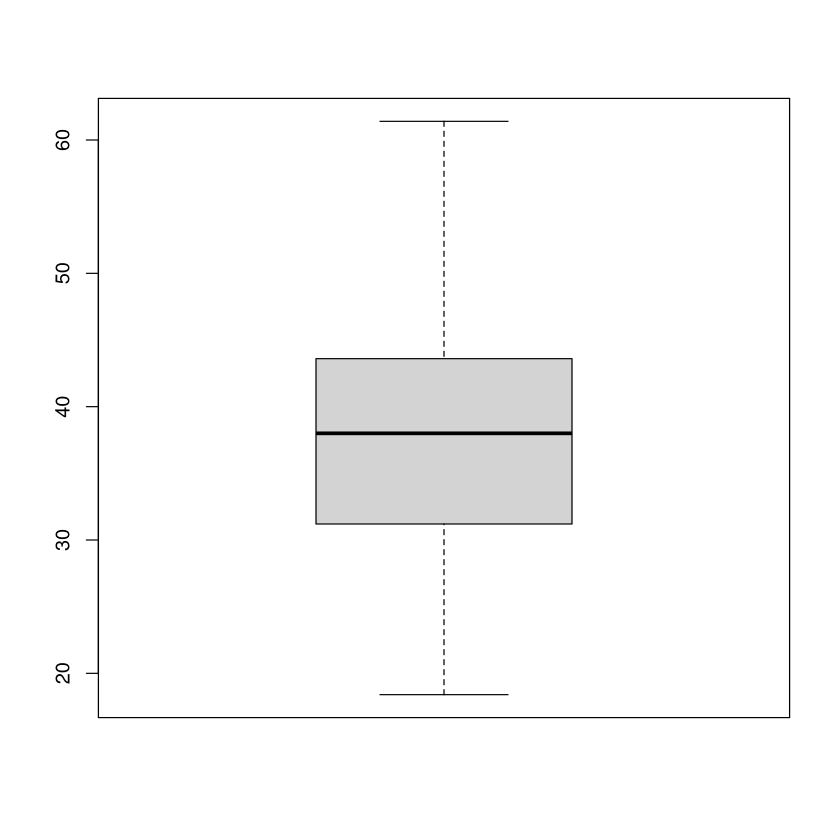

In [39]:
boxplot(dist_tech_cleared)

In [40]:
shapiro.test(dist_tech_cleared)


	Shapiro-Wilk normality test

data:  dist_tech_cleared
W = 0.99266, p-value = 0.4327


In [41]:
t.test(dist_tech_cleared,alternative = "greater",conf.level = 0.95)


	One Sample t-test

data:  dist_tech_cleared
t = 59.004, df = 195, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 36.56914      Inf
sample estimates:
mean of x 
 37.62296 


In [44]:
sd(dist_tech_cleared,na.rm = TRUE)
length(dist_tech_cleared)

[1] 8.926861

[1] 198

In [45]:
t.test(dist_tech_cleared,mu=30,alternative = "greater",conf.level = 0.95)


	One Sample t-test

data:  dist_tech_cleared
t = 11.955, df = 195, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 30
95 percent confidence interval:
 36.56914      Inf
sample estimates:
mean of x 
 37.62296 


In [46]:
dist_sport_cleared = data$dist_cleared[data$field=="sportovni"]

In [47]:
shapiro.test(dist_sport_cleared)


	Shapiro-Wilk normality test

data:  dist_sport_cleared
W = 0.98958, p-value = 0.1649


In [48]:
var.test(dist_sport_cleared,dist_tech_cleared,ratio=1,alternative = "two.sided")


	F test to compare two variances

data:  dist_sport_cleared and dist_tech_cleared
F = 2.2441, num df = 195, denom df = 195, p-value = 2.658e-08
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.693472 2.973826
sample estimates:
ratio of variances 
          2.244124 


In [49]:
t.test(dist_sport_cleared,dist_tech_cleared,mu=0,alternative="greater",var.equal = FALSE)


	Welch Two Sample t-test

data:  dist_sport_cleared and dist_tech_cleared
t = 18.384, df = 340, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 19.21955      Inf
sample estimates:
mean of x mean of y 
 58.73673  37.62296 


In [50]:
data %>% group_by(field) %>% summarise(norm = shapiro.test(dist_cleared)$p.value)

field,norm
<chr>,<dbl>
ekonomicky,0.2670042
humanitni,0.1416967
sportovni,0.1648836
technicky,0.4326779


In [51]:
bartlett.test(data$dist_cleared ~ data$field)


	Bartlett test of homogeneity of variances

data:  data$dist_cleared by data$field
Bartlett's K-squared = 33.451, df = 3, p-value = 2.587e-07


In [53]:
data %>% group_by(field) %>% summarise(skew = moments::skewness(dist_cleared,na.rm = TRUE))

field,skew
<chr>,<dbl>
ekonomicky,0.20780654
humanitni,0.29000003
sportovni,0.29606861
technicky,0.05373744


In [54]:
kruskal.test(data$dist_cleared ~ data$field)


	Kruskal-Wallis rank sum test

data:  data$dist_cleared by data$field
Kruskal-Wallis chi-squared = 256.21, df = 3, p-value < 2.2e-16


In [55]:
library(FSA)

## FSA v0.9.0. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.



In [58]:
dunnTest(data$dist_cleared ~ data$field,method = "bonferroni")

Warning message:
“data$field was coerced to a factor.”
Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




              Comparison           Z      P.unadj        P.adj
1 ekonomicky - humanitni  -4.3236344 1.534796e-05 9.208775e-05
2 ekonomicky - sportovni -13.6667860 1.603213e-42 9.619278e-42
3  humanitni - sportovni  -9.3659146 7.539445e-21 4.523667e-20
4 ekonomicky - technicky   0.4052398 6.853012e-01 1.000000e+00
5  humanitni - technicky   4.7238673 2.314014e-06 1.388409e-05
6  sportovni - technicky  14.0541566 7.264217e-45 4.358530e-44

In [60]:
effects = data %>% group_by(field) %>% summarise(medians = median(dist_cleared,na.rm = TRUE))
effects

field,medians
<chr>,<dbl>
ekonomicky,37.80
humanitni,43.45
sportovni,57.85
technicky,38.00


In [61]:
total_median = median(data$dist_cleared,na.rm = TRUE)
total_median

[1] 43

In [62]:
effects$effect = effects$medians - total_median
effects

field,medians,effect
<chr>,<dbl>,<dbl>
ekonomicky,37.80,-5.20
humanitni,43.45,0.45
sportovni,57.85,14.85
technicky,38.00,-5.00
